## Smoothing and thresholding relation - tests

In [33]:
from src.distance_measures import analyse_video, analyse_image
from src.gaussian_noise import generate_noise_array, generate_noise
from src.preprocessing import process_image, process_video
from src.gradient_descent import find_default_params
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from tqdm import tqdm
from skimage import filters
from skimage.morphology import label
from skimage.measure import regionprops
import statistics
from scipy.stats import percentileofscore
import numpy as np
# import imageio
from matplotlib import cm
from IPython.display import display, clear_output

### 4-step process to generate synthetic data

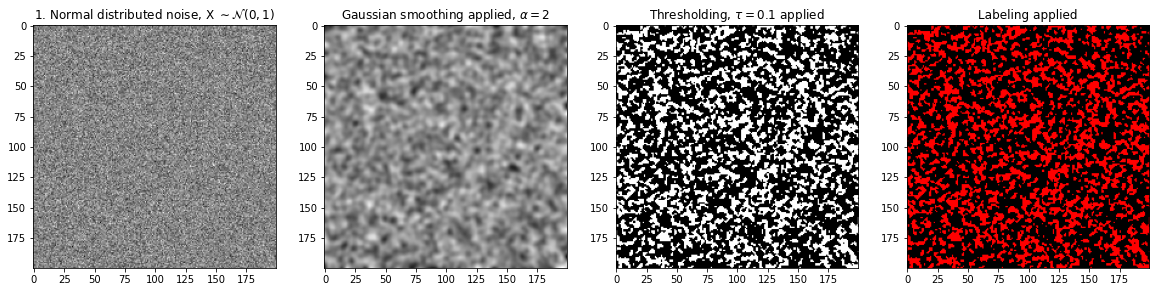

In [34]:
plt.rcParams['image.cmap'] = 'gray'

fig, ax = plt.subplots(1,4, figsize=(20,15))

im = np.random.normal(size=(200, 200))

noise1 = im
noise2 = filters.gaussian(im, 2)
noise3 = filters.gaussian(im, 1) > (0.1)
noise4 = label(filters.gaussian(im, 3) > (0.1))

ax[0].set_title(r'1. Normal distributed noise, X $\sim \mathcal{N}(0,1)$')
ax[0].imshow((noise1))
ax[1].set_title(r'Gaussian smoothing applied, $\alpha = 2$')
ax[1].imshow((noise2))
ax[2].set_title(r'Thresholding, $\tau = 0.1$ applied')
ax[2].imshow((noise3))
ax[3].set_title(r'Labeling applied')
ax[3].imshow(label2rgb(noise3))


### Varying smoothing parameter while keeping threshold constant

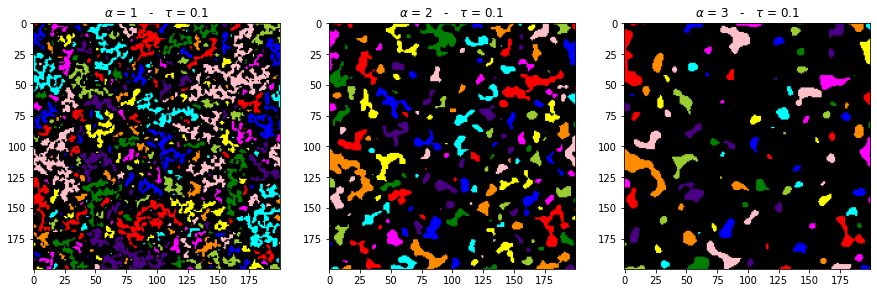

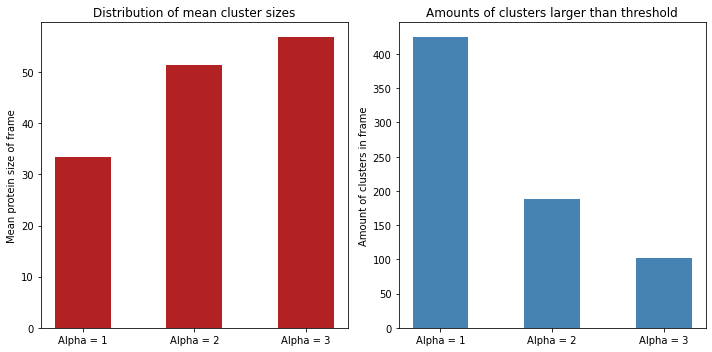

In [35]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

im = np.random.normal(size=(200, 200))

noise1 = label(filters.gaussian(im, 1) > (0.1))
noise2 = label(filters.gaussian(im, 2) > (0.1))
noise3 = label(filters.gaussian(im, 3) > (0.1))

ax[0].set_title(r'$\alpha$ = 1   -   $\tau$ = 0.1')
ax[0].imshow(label2rgb(noise1))
ax[1].set_title(r'$\alpha$ = 2   -   $\tau$ = 0.1')
ax[1].imshow(label2rgb(noise2))
ax[2].set_title(r'$\alpha$ = 3   -   $\tau$ = 0.1')
ax[2].imshow(label2rgb(noise3))

fig1,ax1 = plt.subplots(1,2,figsize=(10,5))
means_gaus = np.zeros(3)
amounts_gaus = np.zeros(3)
gauss = [noise1, noise2, noise3]
for i in range(3):
    gaus_regions = regionprops(gauss[i])
    for gaus_region in gaus_regions:
        means_gaus[i] = means_gaus[i] + gaus_region.area
    means_gaus[i] = means_gaus[i] / len(gaus_regions)
    amounts_gaus[i] = len(gaus_regions)

X = ['Alpha = 1','Alpha = 2','Alpha = 3']
X_axis = np.arange(len(X))
ax1[0].bar(X_axis, means_gaus, 0.5, color='firebrick')
ax1[0].set_xticks(X_axis, X)
ax1[0].set_ylabel("Mean protein size of frame")
ax1[0].set_title("Distribution of mean cluster sizes")

ax1[1].bar(X_axis, amounts_gaus, 0.5, color='steelblue')
ax1[1].set_xticks(X_axis, X)
ax1[1].set_ylabel("Amount of clusters in frame")
ax1[1].set_title("Amounts of clusters larger than threshold")

plt.tight_layout()
plt.show()

### Interrelation of smoothing parameter and thresholding

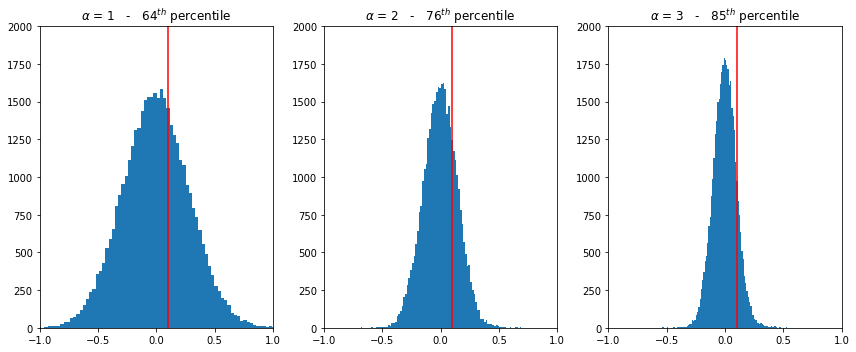

In [36]:
fig, ax = plt.subplots(1,3, figsize=(12,5))

ax[0].set_title(r'$\alpha$ = 1   -   $64^{th}$ percentile')
ax[0].hist(filters.gaussian(im,1).flatten(),100)
ax[0].plot([0.1, 0.1], [0, 2000], 'r-')

ax[0].set_xlim(-1,1)
ax[0].set_ylim(0,2000)

ax[1].set_title(r'$\alpha$ = 2   -   $76^{th}$ percentile')
ax[1].hist(filters.gaussian(im,2).flatten(),100)
ax[1].plot([0.1, 0.1], [0, 2000], 'r-')
ax[1].set_xlim(-1,1)
ax[1].set_ylim(0,2000)

ax[2].set_title(r'$\alpha$ = 3   -   $85^{th}$ percentile')
ax[2].hist(filters.gaussian(im,3).flatten(),100)
ax[2].plot([0.1, 0.1], [0, 2000], 'r-')
ax[2].set_xlim(-1,1)
ax[2].set_ylim(0,2000)

plt.tight_layout()
plt.show()

In [37]:
def generate_poly(siz=800, percentile=80, degree=4):
    im = np.random.normal(size=(siz, siz))
    conf_interval_lower=[]

    for i in np.linspace(1,3,30):
        imFilt = filters.gaussian(im, i)
        conf_interval_lower.append(np.percentile(imFilt,(percentile)))

    x=np.linspace(1,3,30)
    y_lower=conf_interval_lower
    coefficients_lower = np.polyfit(x, y_lower, degree)
    polynomial_lower = np.poly1d(coefficients_lower)

    return polynomial_lower

0.23349101628973967 0.11593626503160648 0.07674454575382728


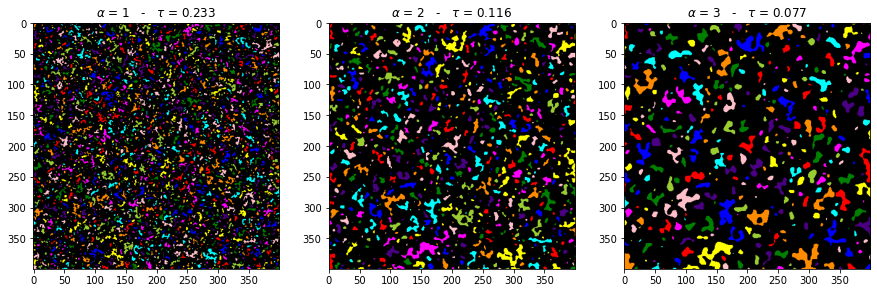

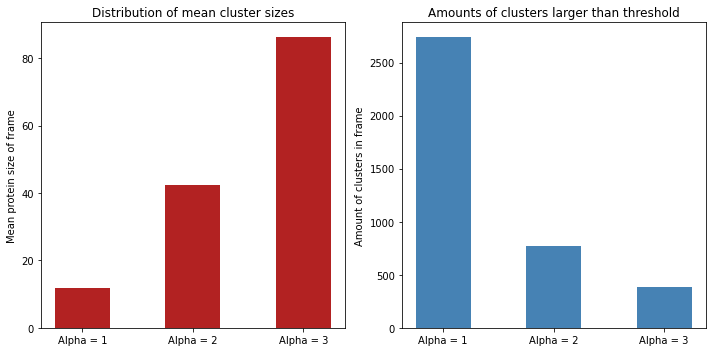

In [38]:
polyFun = generate_poly(percentile=80)

fig, ax = plt.subplots(1,3, figsize=(15,10))

im = np.random.normal(size=(400, 400))

noise1 = label(filters.gaussian(im, 1) > polyFun(1))
noise2 = label(filters.gaussian(im, 2) > polyFun(2))
noise3 = label(filters.gaussian(im, 3) > polyFun(3))

print(polyFun(1),polyFun(2),polyFun(3))

ax[0].set_title(r'$\alpha$ = 1   -   $\tau$ = {0}'.format(round(polyFun(1),3)))
ax[0].imshow(label2rgb(noise1))
ax[1].set_title(r'$\alpha$ = 2   -   $\tau$ = {0}'.format(round(polyFun(2),3)))
ax[1].imshow(label2rgb(noise2))
ax[2].set_title(r'$\alpha$ = 3   -   $\tau$ = {0}'.format(round(polyFun(3),3)))
ax[2].imshow(label2rgb(noise3))

fig1,ax1 = plt.subplots(1,2,figsize=(10,5))
means_gaus = np.zeros(3)
amounts_gaus = np.zeros(3)
gauss = [noise1, noise2, noise3]
for i in range(3):
    gaus_regions = regionprops(gauss[i])
    for gaus_region in gaus_regions:
        means_gaus[i] = means_gaus[i] + gaus_region.area
    means_gaus[i] = means_gaus[i] / len(gaus_regions)
    amounts_gaus[i] = len(gaus_regions)

X = ['Alpha = 1','Alpha = 2','Alpha = 3']
X_axis = np.arange(len(X))
ax1[0].bar(X_axis, means_gaus, 0.5, color='firebrick')
ax1[0].set_xticks(X_axis, X)
ax1[0].set_ylabel("Mean protein size of frame")
ax1[0].set_title("Distribution of mean cluster sizes")

ax1[1].bar(X_axis, amounts_gaus, 0.5, color='steelblue')
ax1[1].set_xticks(X_axis, X)
ax1[1].set_ylabel("Amount of clusters in frame")
ax1[1].set_title("Amounts of clusters larger than threshold")


plt.tight_layout()
plt.show()


In [39]:
import cv2
import numpy as np

im = np.random.normal(size=(400, 400))

noise3 = label(filters.gaussian(im, 3) > polyFun(3))

labels=noise3
output_image = np.zeros_like(noise3)

for j,label_ in enumerate(range(1, labels.max())):
    cluster = np.where(labels == label_, 1, 0).astype(np.uint8)
    M = cv2.moments(cluster)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    mask = np.zeros_like(noise3)

    if (j%4==0):
        k=2
    else:
        k=1
    r = int(np.sqrt(np.count_nonzero(cluster))/2)+k
    cv2.circle(mask, (cX, cY), r, label_, -1)

    output_image = np.where(mask == label_, label_, output_image)


In [40]:
def visualize_(video, F_list, G_list, F_noise=np.array([]), G_noise=np.array([]), L=100, save=False):
    """Visualizes a list of data overlaps, can compare with one dataset"""
    fig, ax = plt.subplots(1,3, figsize=(18,6))
    plt.tight_layout()

    colors = ['firebrick','steelblue']

    for i in range(len(F_list)):
        M = video[i].shape[0] - L
        bx = (L, M, M, L, L)
        by = (L, L, M, M, L)

        ax[0].plot(F_list[i]/G_list[i], color=colors[i],label='frame nr.{}'.format(i+1))
        ax[0].set_xlabel('r')
        ax[0].set_ylabel('percentage in decimal')
        ax[0].set_title('fractional area overlap')
        ax[1].plot(bx, by, '-r')
        ax[1].imshow(label2rgb(video[0], bg_label=0))
        ax[1].set_title('frame nr.1')        
        ax[2].plot(bx, by, '-r')
        ax[2].imshow(label2rgb(video[-1], bg_label=0))
        ax[2].set_title('frame nr.2')
        
        for a in ax[:3]:
            a.legend()

        display(fig)
        clear_output(wait = True)

    plt.show()


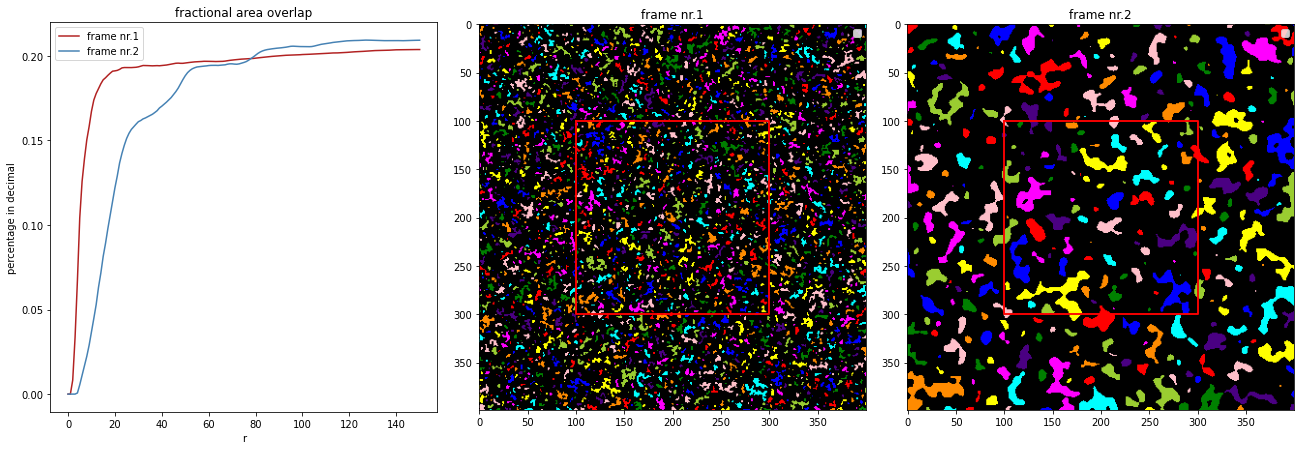

In [41]:
n1_F, n1_G = analyse_image(noise1, L=150)
n3_F, n3_G = analyse_image(noise3, L=150)

visualize_([noise1,noise3], [n1_F,n3_F],[n1_G,n3_G])

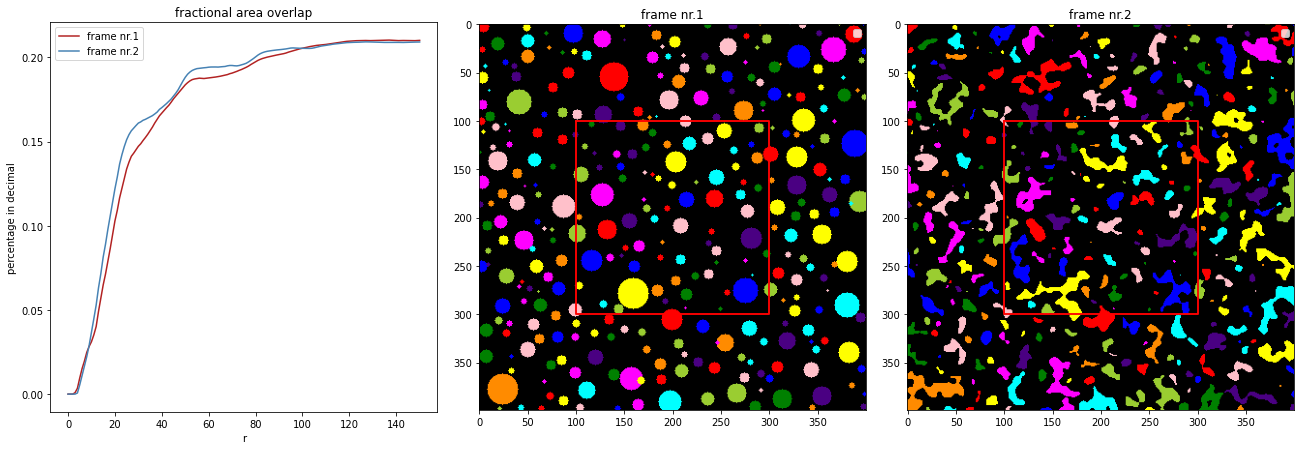

In [43]:
n1_F, n1_G = analyse_image(output_image, L=150)
n3_F, n3_G = analyse_image(noise3, L=150)
visualize_([output_image,noise3], [n1_F,n3_F],[n1_G,n3_G])
